In [1]:
import librosa
import numpy as np
import librosa.display
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

signal shape :  (400000,)


Text(0.5, 1.0, 'Waveform')

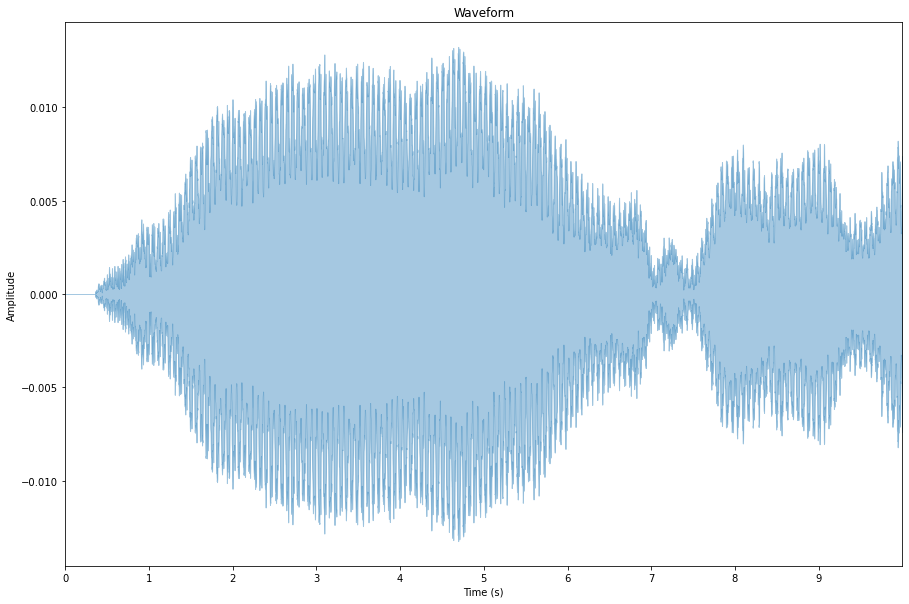

In [2]:
FIG_SIZE = (15, 10)
file = "C:/Users/Samsung/Desktop/2022 겨울방학/서강대 아텍 라이프스타일미디어디자인 그룹/코드/sound_data/16000남쪽_cut.wav"

# load audio file with Librosa
signal_South, sample_rate_South = librosa.load(file, sr=40000)
print('signal shape : ', signal_South.shape)

# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal_South, sample_rate_South, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

signal shape :  (400000,)


Text(0.5, 1.0, 'Waveform')

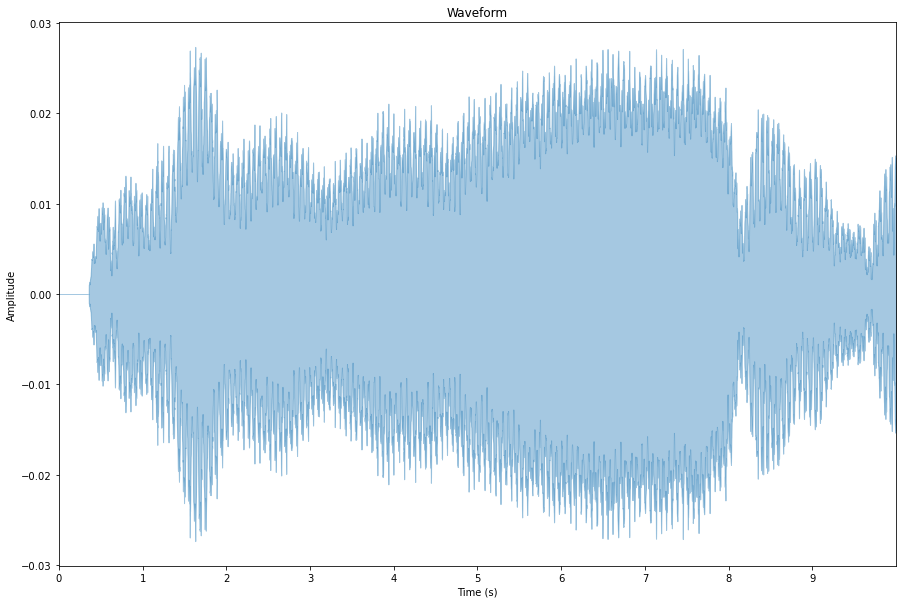

In [3]:
FIG_SIZE = (15, 10)
file2 = "C:/Users/Samsung/Desktop/2022 겨울방학/서강대 아텍 라이프스타일미디어디자인 그룹/코드/sound_data/16000북쪽_cut.wav"

# load audio file with Librosa
signal_North, sample_rate_North = librosa.load(file2, sr=40000)
print('signal shape : ', signal_North.shape)

# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal_North, sample_rate_North, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [4]:
abs_signal_South=abs(signal_South)

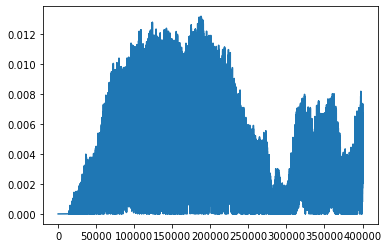

In [5]:
plt.plot(abs_signal_South)

In [6]:
abs_signal_North=abs(signal_North)

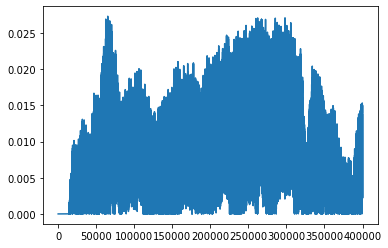

In [7]:
plt.plot(abs_signal_North)

In [8]:
np.mean(abs_signal_South)

0.0036677292

In [9]:
np.median(abs_signal_South)

0.003010856

In [10]:
np.mean(abs_signal_North)

0.008969223

In [11]:
np.median(abs_signal_North)

0.00822698

In [12]:
FIG_SIZE = (15, 10)
file2 = "C:/Users/Samsung/Desktop/2022 겨울방학/서강대 아텍 라이프스타일미디어디자인 그룹/코드/sound_data/16000동쪽_cut.wav"

# load audio file with Librosa
signal_East, sample_rate_East = librosa.load(file2, sr=40000)
print('signal shape : ', signal_East.shape)

signal shape :  (400000,)


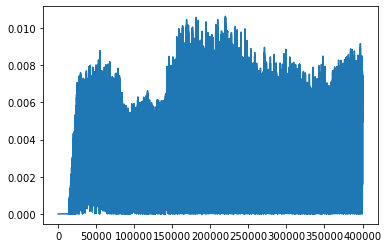

In [13]:
abs_signal_East=abs(signal_East)
plt.plot(abs_signal_East)

In [14]:
np.mean(abs_signal_East)

0.003979353

In [15]:
np.median(abs_signal_East)

0.0041495115

In [16]:
FIG_SIZE = (15, 10)
file2 = "C:/Users/Samsung/Desktop/2022 겨울방학/서강대 아텍 라이프스타일미디어디자인 그룹/코드/sound_data/16000서쪽_cut.wav"

# load audio file with Librosa
signal_West, sample_rate_West = librosa.load(file2, sr=40000)
print('signal shape : ', signal_West.shape)

signal shape :  (400000,)


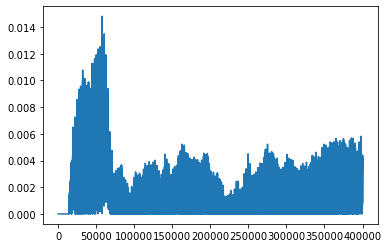

In [17]:
abs_signal_West=abs(signal_West)
plt.plot(abs_signal_West)

In [18]:
np.mean(abs_signal_West)

0.0019658096

In [19]:
np.median(abs_signal_West)

0.0015067988

In [20]:
from statistics import mode #최빈값은 안되겠다..

mode(abs_signal_West)

0.0

In [21]:
#각 방향의 퍼센트
per_East = 100* np.mean(abs_signal_East)/(np.mean(abs_signal_East)+np.mean(abs_signal_West)+np.mean(abs_signal_South)+np.mean(abs_signal_North))
per_West = 100* np.mean(abs_signal_West)/(np.mean(abs_signal_East)+np.mean(abs_signal_West)+np.mean(abs_signal_South)+np.mean(abs_signal_North))
per_South = 100* np.mean(abs_signal_South)/(np.mean(abs_signal_East)+np.mean(abs_signal_West)+np.mean(abs_signal_South)+np.mean(abs_signal_North))
per_North = 100* np.mean(abs_signal_North)/(np.mean(abs_signal_East)+np.mean(abs_signal_West)+np.mean(abs_signal_South)+np.mean(abs_signal_North))
print(per_East, per_West,per_South,per_North)

21.41496153293685 10.579041291987318 19.737953500717758 48.2680424213756


In [22]:
per_arr=[per_West, per_North, per_East, per_South]

In [23]:
len(abs_signal_West)

400000

North=Right라 가정!

<ipython-input-133-63c9b154c6df>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


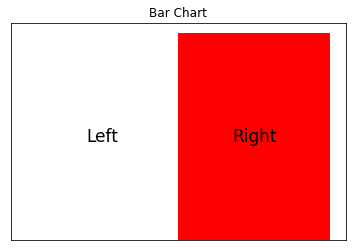

In [133]:
if np.mean(abs_signal_North) > np.mean(abs_signal_South):
    x_label=['Left','Right']
    colors=['white','red']
    plt.bar(range(len(x_label)),[100, 100], width=1,color=colors)

    ax = plt.subplot()
    #ax.set_xticks([0, 1])
    #ax.set_xticklabels(x_label)

    #plt.annotate("Left", ha='center', va='center',size=14)
    #plt.annotate('Left', xy=(0,50), xytext=(0,0), fontsize=14, ha='center',va='center')


    plt.text(0, 50, 'Left', ha='center', va='center',fontsize=17)
    plt.text(1, 50, 'Right', ha='center', va='center',fontsize=17)


    ax.set_title("Bar Chart")
    #ax.axis('off')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()

else:
    x_label=['Left','Right']
    colors=['Red','White']
    plt.bar(range(len(x_label)),[100, 100], width=1,color=colors)

    ax = plt.subplot()
    #ax.set_xticks([0, 1])
    #ax.set_xticklabels(x_label)

    #plt.annotate("Left", ha='center', va='center',size=14)
    #plt.annotate('Left', xy=(0,50), xytext=(0,0), fontsize=14, ha='center',va='center')


    plt.text(0, 50, 'Left', ha='center', va='center',fontsize=17)
    plt.text(1, 50, 'Right', ha='center', va='center',fontsize=17)


    ax.set_title("Bar Chart")
    #ax.axis('off')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()

In [24]:
theta

NameError: name 'theta' is not defined

In [ ]:
from matplotlib import cm

N = 4
bottom = 0
max_height = 10

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
#radii = max_height*np.random.rand(N)
radii = per_arr
width = (2*np.pi) / N

direction=["West", "North", "East", "South"]
color = cm.rainbow(np.linspace(0, 1, N))

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom, tick_label=direction)


# Use custom colors and opacity
for r, bar, c, in zip(radii, bars, color):
    bar.set_facecolor(c) #더 뚜렷한 구분
    #bar.set_facecolor(plt.cm.jet(r/100.)) #비슷한 계열색
    bar.set_alpha(0.7)

plt.show()

In [ ]:
N = 4
bottom = 0
max_height = 10

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
#radii = max_height*np.random.rand(N)
radii = per_arr
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
color = cm.rainbow(np.linspace(0, 1, N))
for r, bar, c in zip(radii, bars, color):
    #bar.set_facecolor(c) #더 뚜렷한 구분
    bar.set_facecolor(plt.cm.jet(r/100.)) #비슷한 계열색
    bar.set_alpha(0.7)
    
#plt.colorbar()
plt.show()

<ipython-input-26-8f82a3d5af03>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


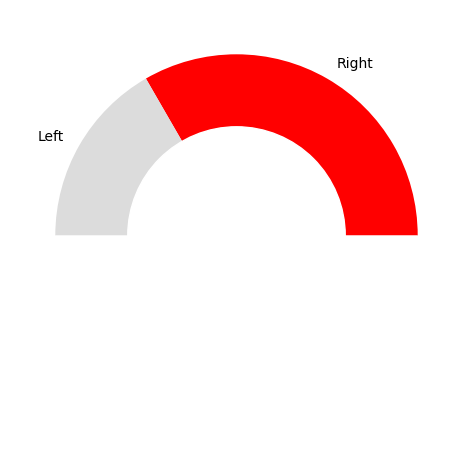

In [26]:
# data
label = ["Right", "Left"]
val = [2,1]

# append data and assign color
label.append("")
val.append(sum(val))  # 50% blank
colors = ['red', 'gainsboro', 'white']

# plot
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.pie(val, labels=label, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
fig.show()

<ipython-input-16-88dcbf865a54>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


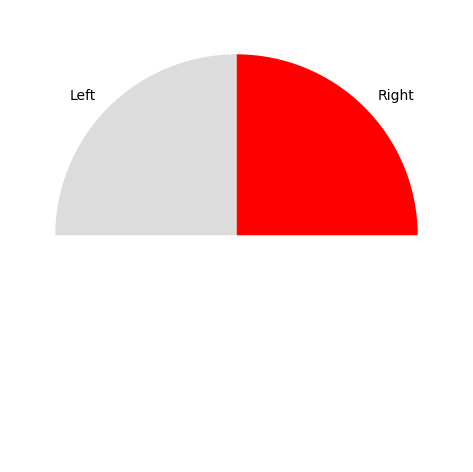

In [16]:
# data
label = ["Right", "Left"]
val = [1,1]

# append data and assign color
label.append("")
val.append(sum(val))  # 50% blank
colors = ['red', 'gainsboro', 'white']

# plot
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.pie(val, labels=label, colors=colors)
#ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
fig.show()

<ipython-input-14-0711be78c69a>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


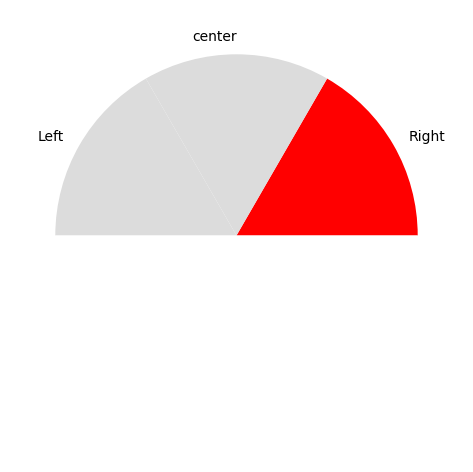

In [14]:
# data
label = ["Right", "center", "Left"]
val = [1,1,1]

# append data and assign color
label.append("")
val.append(sum(val))  # 50% blank
colors = ['red', 'gainsboro','gainsboro', 'white']

# plot
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.pie(val, labels=label, colors=colors)
#ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
fig.show()

<ipython-input-17-0b831eea2ad5>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


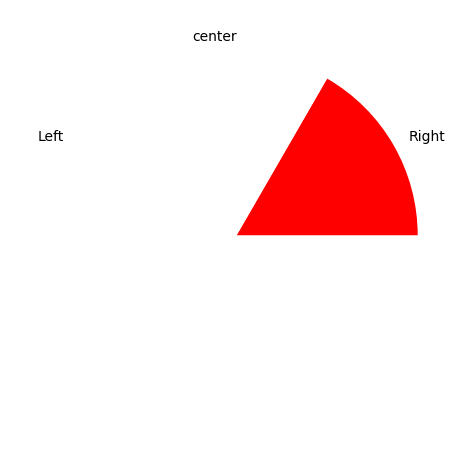

In [17]:
# data
label = ["Right", "center", "Left"]
val = [1,1,1]

# append data and assign color
label.append("")
val.append(sum(val))  # 50% blank
colors = ['red', 'white','white', 'white']

# plot
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.pie(val, labels=label, colors=colors)
#ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
fig.show()

In [38]:
df = ['Left', "Right"]
df.plot(kind="bar", legend=False, width=0.8)
for i, (p, pr) in enumerate(zip(df.index, df["Percent"])):
    plt.text(s=p, x=1, y=i, color="w", verticalalignment="center", size=18)
    plt.text(s=str(pr)+"%", x=pr-5, y=i, color="w",
             verticalalignment="center", horizontalalignment="left", size=18)
plt.axis("off")
# xticks & yticks have empty lists to reduce white space in plot
plt.xticks([])
plt.yticks([])

TypeError: 'list' object is not callable

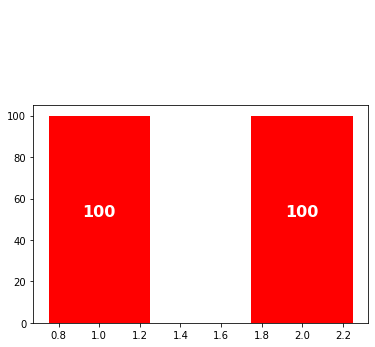

In [60]:
A = [100,100]
B = [91, 70, 72]

fig = plt.figure(facecolor="white")

ax = fig.add_subplot(1, 1, 1)

bar_l = np.arange(1, 3)
tick_pos = [i + (bar_width / 2) for i in bar_l]

ax1 = ax.bar(bar_l, A, width=bar_width, label="A", color="Red")

#ax.legend(loc="best")
#plt.xticks(tick_pos, ["C1", "C2", "C3"], fontsize=16)
#plt.yticks(fontsize=16)

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")

plt.show()

In [48]:
bar_l

array([1, 2, 3])

In [20]:
len(signal)

400000

In [32]:
signal[100000:100010]

array([-0.00669422,  0.00298616,  0.00228101, -0.00611797,  0.00832659,
       -0.00654269,  0.00293398,  0.00212313, -0.00617197,  0.00832198],
      dtype=float32)

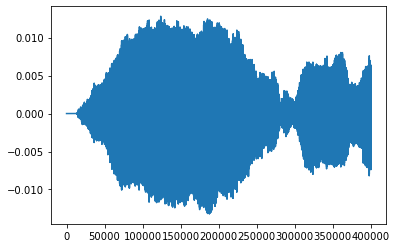

In [53]:
plt.plot(signal)

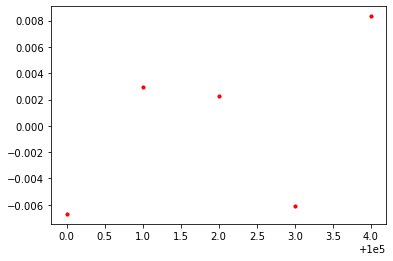

In [66]:
x=np.linspace(100000,100004,5)
plt.scatter(x,signal[100000:100005], c='red', s=10)

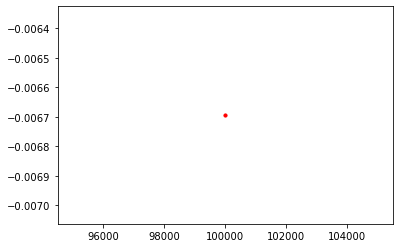

In [61]:
plt.scatter(100000,signal[100000], c='red', s=10)

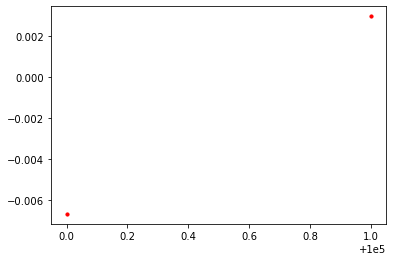

In [62]:
plt.scatter(100000,signal[100000], c='red', s=10)
plt.scatter(100001,signal[100001], c='red', s=10)

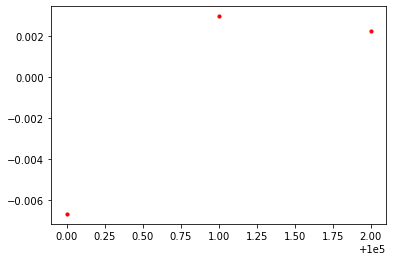

In [63]:
plt.scatter(100000,signal[100000], c='red', s=10)
plt.scatter(100001,signal[100001], c='red', s=10)
plt.scatter(100002,signal[100002], c='red', s=10)

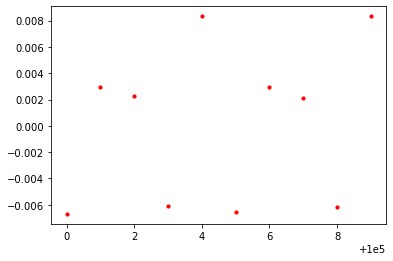

In [67]:
x=np.linspace(100000,100009,10)
plt.scatter(x,signal[100000:100010], c='red', s=10)

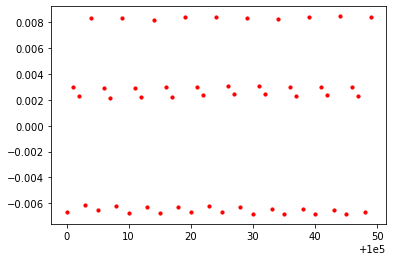

In [69]:
x=np.linspace(100000,100049,50)
plt.scatter(x,signal[100000:100050], c='red', s=10)

In [8]:
np.mean(abs_signal)

0.0036677292

In [9]:
np.mean(abs_signal2)

0.008969223

In [21]:
np.mean(signal)

-2.9283e-07

fft shape :  (400000,)
spectrum shape :  (400000,)
f shape :  (400000,)
left_spectrum shape :  (200000,)
left_f shape :  (200000,)


Text(0.5, 1.0, 'Power spectrum')

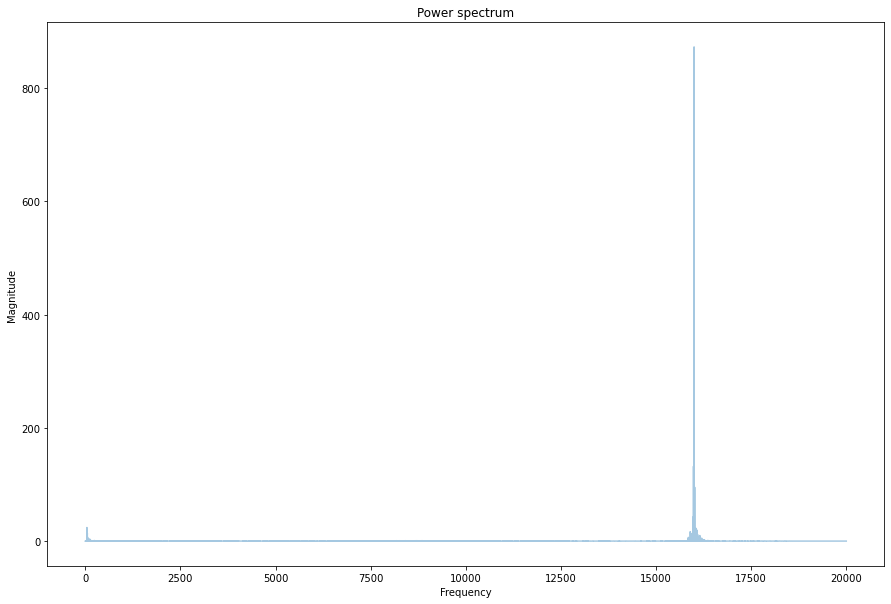

In [9]:
# perform Fourier Transform
fft = np.fft.fft(signal)
print("fft shape : ", fft.shape)

# Calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
print("spectrum shape : ", spectrum.shape)

# Create Frequency Variable
f = np.linspace(0, sample_rate, len(spectrum))
print("f shape : ", f.shape)

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
print('left_spectrum shape : ', left_spectrum.shape)

print('left_f shape : ', left_f.shape)

# plot specturm
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

STFT hop length duration is : 0.0128s
STFT window duration is : 0.0512s
stft shape :  (1025, 782)
spectrogram shape :  (1025, 782)


Text(0.5, 1.0, 'Spectrogram')

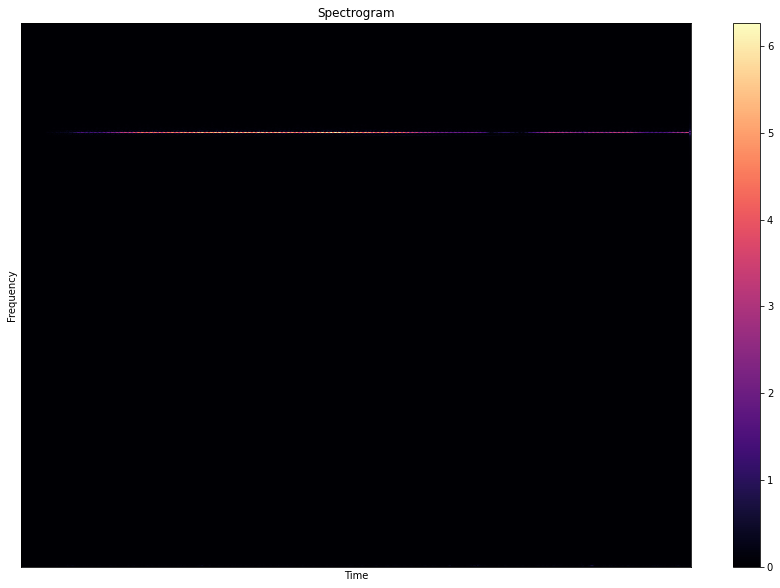

In [12]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# Calculate duration hop length and window in seconds 
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is : {}s".format(hop_length_duration))

print("STFT window duration is : {}s".format(n_fft_duration))

# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
print("stft shape : ", stft.shape)

# Calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
print("spectrogram shape : ", spectrogram.shape)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

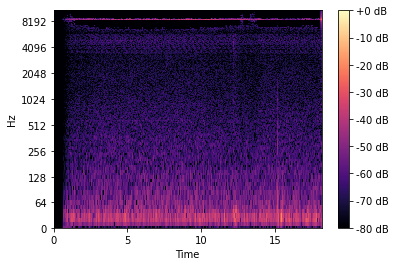

In [17]:
D = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')

In [22]:
np.mean(signal2)

-4.018252e-07

fft2 shape :  (400000,)
spectrum2 shape :  (400000,)
f2 shape :  (400000,)
left_spectrum2 shape :  (200000,)
left_f2 shape :  (200000,)


Text(0.5, 1.0, 'Power spectrum')

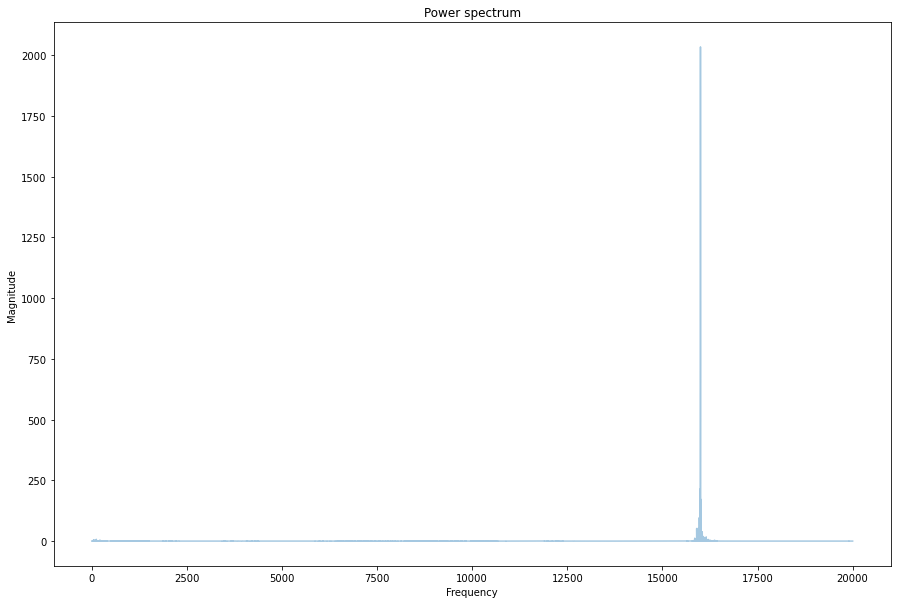

In [10]:
# perform Fourier Transform
fft2 = np.fft.fft(signal2)
print("fft2 shape : ", fft2.shape)

# Calculate abs values on complex numbers to get magnitude
spectrum2 = np.abs(fft2)
print("spectrum2 shape : ", spectrum2.shape)

# Create Frequency Variable
f2 = np.linspace(0, sample_rate2, len(spectrum2))
print("f2 shape : ", f2.shape)

# take half of the spectrum and frequency
left_spectrum2 = spectrum2[:int(len(spectrum2)/2)]
left_f2 = f2[:int(len(spectrum2)/2)]
print('left_spectrum2 shape : ', left_spectrum2.shape)

print('left_f2 shape : ', left_f2.shape)

# plot specturm
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f2, left_spectrum2, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

STFT hop length duration is : 0.0128s
STFT window duration is : 0.0512s
stft2 shape :  (1025, 782)
spectrogram2 shape :  (1025, 782)


Text(0.5, 1.0, 'Spectrogram')

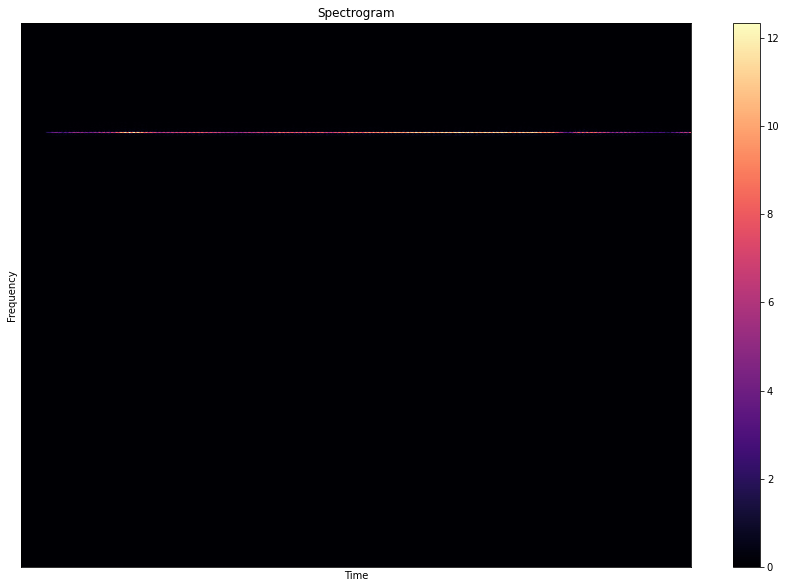

In [13]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# Calculate duration hop length and window in seconds 
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is : {}s".format(hop_length_duration))

print("STFT window duration is : {}s".format(n_fft_duration))

# Perform STFT
stft2 = librosa.stft(signal2, n_fft=n_fft, hop_length=hop_length)
print("stft2 shape : ", stft2.shape)

# Calculate abs values on complex numbers to get magnitude
spectrogram2 = np.abs(stft2)
print("spectrogram2 shape : ", spectrogram2.shape)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram2, sr=sample_rate2, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

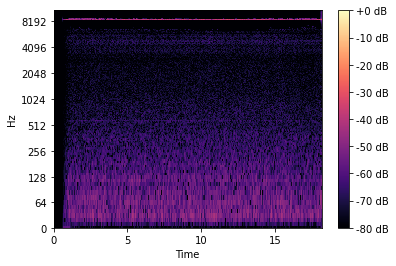

In [16]:
D2 = librosa.amplitude_to_db(np.abs(stft2), ref=np.max)
librosa.display.specshow(D2, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')